In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


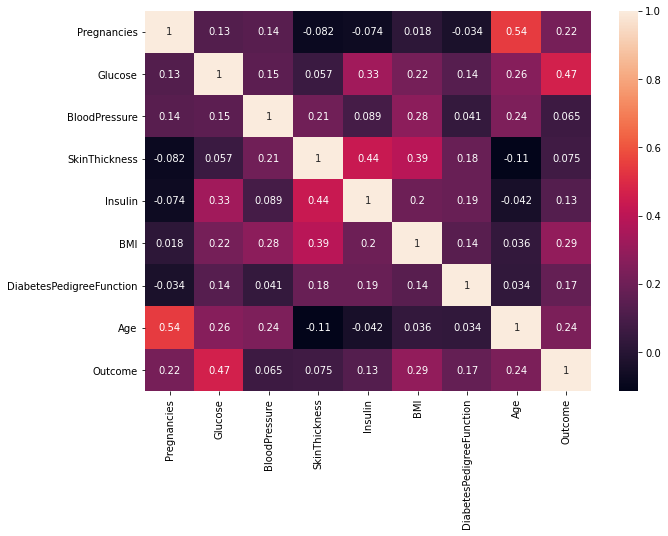

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

As there is 0 value present in Glucose,'BloodPressure','SkinThickness','Insulin','BMI' which does not make any sense so, replace that with mean value

In [6]:
df[df['Glucose']==0].value_counts().sum()

5

In [7]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)

In [8]:
df[df['BloodPressure']==0].value_counts().sum()

35

In [9]:
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)

In [10]:
df[df['SkinThickness']==0].value_counts().sum()

227

In [11]:
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)

In [12]:
df[df['Insulin']==0].value_counts().sum()

374

In [13]:
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)

In [14]:
df[df['BMI']==0].value_counts().sum()

11

In [15]:
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


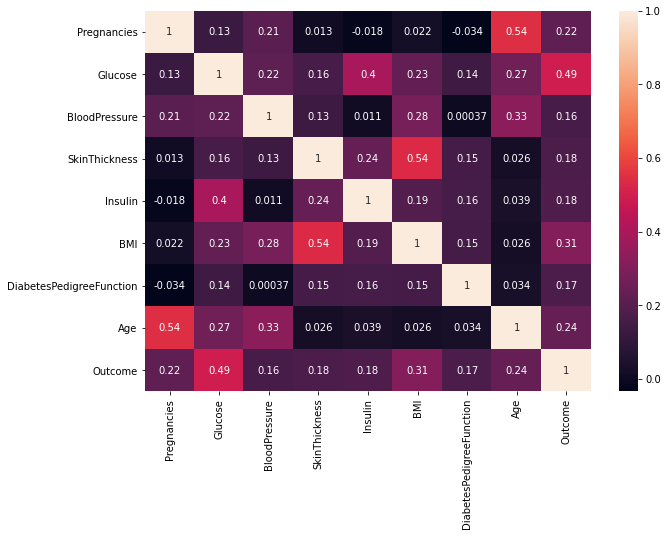

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1]


In [19]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=8, activation="sigmoid")
])

model.compile(optimizer="sgd", loss="binary_crossentropy")

In [23]:
trained_model = model.fit(x_train_ss,y_train,epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 2ms/step - loss: 0.9946
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.9433
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.8967
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.8553
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 0.8181
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7849
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.7551
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7288
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 0.7053
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6844
Epoch 11/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6657
Epoch 12/50
17/17 [==============================] - 0s 1ms/step - loss: 0.6488
Epoch 13/50
17/17 [==============================

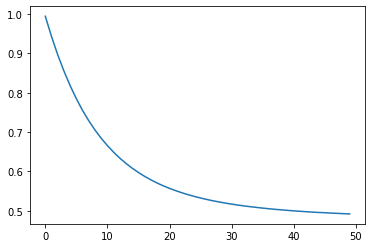

In [24]:
plt.plot(trained_model.history['loss'])

In [25]:
y_pred = model.predict(x_test_ss)

In [26]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

